# fastlite-migrations

> Simple migrations for fastlite

Manage your database migrations with ease.

## Usage

### Installation

Install from [pypi][pypi]:

```sh
$ pip install fastlite_migrations
```

Or install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/ozpau/fastlite-migrations.git
```

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [pypi][pypi].

[repo]: https://github.com/ozpau/fastlite-migrations
[docs]: https://ozpau.github.io/fastlite-migrations/
[pypi]: https://pypi.org/project/fastlite-migrations/
[conda]: https://anaconda.org/ozpau/fastlite-migrations

## How to use

In [ ]:
from fastlite import *
from fastlite_migrations import *

In [ ]:
db = database(":memory:")

In [ ]:
@db.add_migration(0)
def initial_db(db): db.q("CREATE TABLE users (id INTEGER PRIMARY KEY AUTOINCREMENT)")

@db.add_migration(1)
def add_cats(db): db.q("CREATE TABLE cats (id INTEGER PRIMARY KEY AUTOINCREMENT)")

@db.add_migration(2)
def add_cat_hats_prop(db): db.q("ALTER TABLE cats ADD COLUMN hats TEXT")

In [ ]:
db.migrate()

0 initial_db
1 add_cats
2 add_cat_hats_prop


In [ ]:
cats = db.t.cats
Cat = cats.dataclass()

In [ ]:
hat_types = ["Top Hat", "Baseball Cap", "Cowboy Hat", "Wizard Hat", "Beanie", "Pirate Hat",
             "Sun Hat", "Party Hat", "Bunny Ears", "Chef Hat", "Hard Hat", "Feathered Hat",
             "Crown", "Sailor Hat", "Headband with Flowers"]

In [ ]:
import random

In [ ]:
for i in range(100):
    cats.insert(Cat(i, random.choice(hat_types)))

In [ ]:
L(cats())

(#100) [Cats(id=0, hats='Sun Hat'),Cats(id=1, hats='Baseball Cap'),Cats(id=2, hats='Baseball Cap'),Cats(id=3, hats='Sun Hat'),Cats(id=4, hats='Feathered Hat'),Cats(id=5, hats='Sailor Hat'),Cats(id=6, hats='Bunny Ears'),Cats(id=7, hats='Wizard Hat'),Cats(id=8, hats='Cowboy Hat'),Cats(id=9, hats='Sailor Hat'),Cats(id=10, hats='Crown'),Cats(id=11, hats='Top Hat'),Cats(id=12, hats='Sun Hat'),Cats(id=13, hats='Bunny Ears'),Cats(id=14, hats='Beanie'),Cats(id=15, hats='Cowboy Hat'),Cats(id=16, hats='Pirate Hat'),Cats(id=17, hats='Beanie'),Cats(id=18, hats='Top Hat'),Cats(id=19, hats='Sailor Hat')...]

What if we now decide we want to store hat names in a separate table?

In [ ]:
hat_types_zh = ["高顶帽", "棒球帽", "牛仔帽", "巫师帽", "毛线帽", "海盗帽", "太阳帽", "派对帽",
                "兔耳朵", "厨师帽", "安全帽", "羽毛帽", "王冠", "水手帽", "花头带"]
hat_types_fr = ["Chapeau haut de forme", "Casquette de baseball", "Chapeau de cowboy",
                "Chapeau de sorcier", "Bonnet", "Chapeau de pirate", "Chapeau de soleil",
                "Chapeau de fête", "Oreilles de lapin", "Chapeau de chef", "Casque de chantier",
                "Chapeau à plumes", "Couronne", "Chapeau de marin", "Bandeau avec des fleurs"]
hat_prices = [15.99, 10.50, 20.00, 25.00, 8.99, 18.50, 12.00, 5.99, 7.50, 14.99, 22.00, 16.75, 30.00, 11.50, 9.99]

In [ ]:
@db.add_migration(3)
def add_hats_table(db):
    db.q("""
CREATE TABLE hats (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_en TEXT NOT NULL,
    name_fr TEXT NOT NULL,
    name_zh TEXT NOT NULL,
    price INTEGER NOT NULL
)
    """)

While you work on writing the function above, you can find it convenient to try running migration,
and then cancelling it using the rollback function below:

In [ ]:
@db.add_rollback(3)
def delete_hats_table(db): db.q("DROP TABLE hats")

In [ ]:
db.migrate()

3 add_hats_table


In [ ]:
db.rollback_migration()

3 delete_hats_table


Let's finish writing the migration:

In [ ]:
data = list(map(lambda x: dict(zip(['id', 'name_en', 'name_fr', 'name_zh', 'price'], x)),
                zip(range(len(hat_types)), hat_types, hat_types_fr, hat_types_zh, hat_prices)))
data[:2]

[{'id': 0,
  'name_en': 'Top Hat',
  'name_fr': 'Chapeau haut de forme',
  'name_zh': '高顶帽',
  'price': 15.99},
 {'id': 1,
  'name_en': 'Baseball Cap',
  'name_fr': 'Casquette de baseball',
  'name_zh': '棒球帽',
  'price': 10.5}]

In [ ]:
@db.add_migration(3)
def add_hats_table(db):
    db.q("""
CREATE TABLE hats (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_en TEXT NOT NULL,
    name_fr TEXT NOT NULL,
    name_zh TEXT NOT NULL,
    price INTEGER NOT NULL
)
    """)

    db.t.hats.insert_all(data)

In [ ]:
db.rollback_migration()

No rollback for the latest applied migration found: Migrations(id=2, name='add_cat_hats_prop', inserted_at='2025-03-09 18:56:25')


In [ ]:
db.migrate()

3 add_hats_table


In [ ]:
db.t.hats()[:2]

[{'id': 0,
  'name_en': 'Top Hat',
  'name_fr': 'Chapeau haut de forme',
  'name_zh': '高顶帽',
  'price': 15.99},
 {'id': 1,
  'name_en': 'Baseball Cap',
  'name_fr': 'Casquette de baseball',
  'name_zh': '棒球帽',
  'price': 10.5}]

Now that we have a table of hats, let's connect table of cats to it.

In [ ]:
db.t.cats()[:2]

[Cats(id=0, hats='Sun Hat'), Cats(id=1, hats='Baseball Cap')]

Let's write a migration to change `hats` column to a foreign key that points to `hats` table. We can do this in one transaction.

In [ ]:
db.rollback_migration()

3 delete_hats_table


In [ ]:
@db.add_migration(3)
def add_hats_table(db):
    db.q("""
CREATE TABLE hats (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_en TEXT NOT NULL,
    name_fr TEXT NOT NULL,
    name_zh TEXT NOT NULL,
    price INTEGER NOT NULL
)
    """)

    db.t.hats.insert_all(data)

    db.q("""
ALTER TABLE cats ADD COLUMN hat_id INTEGER;
UPDATE cats SET hat_id = (SELECT id FROM hats WHERE hats.name_en = cats.hats);
    """)
    

In [ ]:
@db.add_rollback(3)
def delete_hats_table(db):
    db.q("""
    ALTER TABLE cats DROP COLUMN hat_id;
    DROP TABLE hats;
    """)

In [ ]:
db.migrate()

3 add_hats_table


We added a column, so we need to recreate `Cat` class:

In [ ]:
Cat = db.t.cats.dataclass()

As you can see, at this point we have `hat_id`s set properly:

In [ ]:
list(zip(db.t.cats(), map(lambda x: hat_types[x.hat_id], db.t.cats())))[:2]

[(Cats(id=0, hats='Sun Hat', hat_id=6), 'Sun Hat'),
 (Cats(id=1, hats='Baseball Cap', hat_id=1), 'Baseball Cap')]

If we are planning to execute this migration in production, and we require zero
downtime, you'd need to do some extra work with the controller side of your application.

But if downtime is ok, we can just update our code to use `hat_id` instead of `hats`, and apply the migration.

Now let's add foreign key constraint.

There is a slight issue with foreign key constraint: SQLite doesn't allow modifying foreign key constraints after the table is created.
So if we need to change these, we have to create a new table from scratch and copy all the data.

For more info on the issue, see https://www.sqlite.org/lang_altertable.html#otheralter

Following the guide, let's first obtain sql to create original table:

In [ ]:
db.q("""
 SELECT type, sql FROM sqlite_schema WHERE tbl_name='cats'
""")

[{'type': 'table',
  'sql': 'CREATE TABLE cats (id INTEGER PRIMARY KEY AUTOINCREMENT, hats TEXT, hat_id INTEGER)'}]

In [ ]:
@db.add_migration(3)
def add_hats_table(db):
    db.q("""
CREATE TABLE hats (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name_en TEXT NOT NULL,
    name_fr TEXT NOT NULL,
    name_zh TEXT NOT NULL,
    price INTEGER NOT NULL
)
    """)

    db.t.hats.insert_all(data)

    db.q("""
ALTER TABLE cats ADD COLUMN hat_id INTEGER;
UPDATE cats SET hat_id = (SELECT id FROM hats WHERE hats.name_en = cats.hats);

CREATE TABLE cats_new (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hat_id INTEGER,
    FOREIGN KEY (hat_id) REFERENCES hats(id)
);
INSERT INTO cats_new SELECT id, hat_id FROM cats;
DROP TABLE cats;
ALTER TABLE cats_new RENAME TO cats;
    """)
    

In [ ]:
db.rollback_migration()

3 delete_hats_table


In [ ]:
db.migrate()

3 add_hats_table


In [ ]:
db.t

cats, hats, migrations, users

Great! Finally we have moved hats from cats!

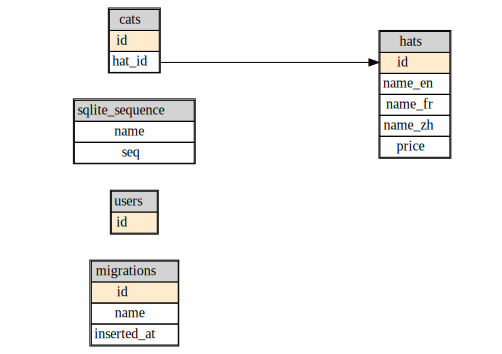

In [ ]:
diagram(db.tables)

In [ ]:
cats, hats = db.t.cats, db.t.hats
Cat, Hat = cats.dataclass(), hats.dataclass()

In [ ]:
cats()[:2], hats()[:2]

([Cats(id=0, hat_id=6), Cats(id=1, hat_id=1)],
 [Hats(id=0, name_en='Top Hat', name_fr='Chapeau haut de forme', name_zh='高顶帽', price=15.99),
  Hats(id=1, name_en='Baseball Cap', name_fr='Casquette de baseball', name_zh='棒球帽', price=10.5)])

Now each cat doesn't have all information about its head stored inside it, but we can run a query to retrieve this information as needed:

In [ ]:
db.q("SELECT cats.*, hats.name_en hat_name, hats.price hat_price FROM cats JOIN hats")[:2]

[{'id': 0, 'hat_id': 6, 'hat_name': 'Top Hat', 'hat_price': 15.99},
 {'id': 0, 'hat_id': 6, 'hat_name': 'Baseball Cap', 'hat_price': 10.5}]

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install fastlite_migrations in Development mode

```sh
# make sure fastlite_migrations package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to fastlite_migrations
$ nbdev_prepare
```